In [1]:
from toysimulations import osm_utils
import osmnx as ox

In [2]:
import matplotlib
import seaborn as sns
sns.set_palette('colorblind')
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Berlin

In [3]:
G_berlin = osm_utils.download_streetnetwork_from_bbox(north=52.5697, south=52.4874, 
                                     east=13.4823, west=13.3216,
                                     upto='secondary')

G_berlin = ox.project_graph(G_berlin)
K_berlin, mapping_berlin = osm_utils.postprocess_osm_network(G_berlin, coarse_grain=100, return_node_mapping=True)

/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [4]:
H_berlin = osm_utils.homogenize_edge_lengths(K_berlin, target_edge_length=400)

In [5]:
def show_graph(G, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    nx.draw_networkx(G, pos={node:(data['x'], data['y']) for node, data in G.nodes(data=True)},
                 with_labels=False, ax = ax, **kwargs)
    ax.axis('off')

/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Original: 169 nodes, 241 edges\nProcessed: 419 nodes, 491 edges')

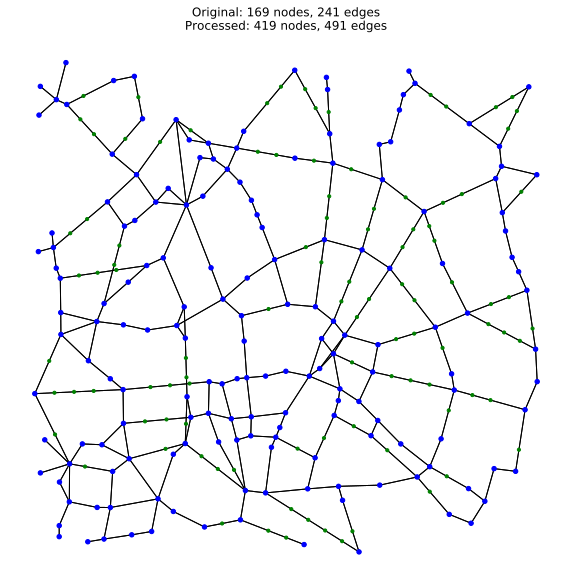

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
show_graph(H_berlin, node_color='green', ax=ax, node_alpha=0.7, node_size=10)
show_graph(K_berlin, node_color='blue', ax = ax, node_size=20)

ax.set_title(f"Original: {K_berlin.number_of_nodes()} nodes, {K_berlin.number_of_edges()} edges\n"
             f"Processed: {H_berlin.number_of_nodes()} nodes, {H_berlin.number_of_edges()} edges")

In [9]:
!mkdir -p ../data/homogenized_networks/berlin

In [10]:
import pickle

In [11]:
nx.write_gpickle(G_berlin, '../data/homogenized_networks/berlin/G_orig.gpkl')
nx.write_gpickle(K_berlin, '../data/homogenized_networks/berlin/G_coarse.gpkl')
nx.write_gpickle(H_berlin, '../data/homogenized_networks/berlin/G_homog.gpkl')

with open('../data/homogenized_networks/berlin/mapping.pkl', 'wb') as f:
    pickle.dump(mapping_berlin, f)

# Harz

In [12]:
G_harz = osm_utils.download_streetnetwork_from_bbox(north=51.9510, south=51.7695, 
                                          east=10.6128, west=10.2090,
                                          upto='secondary')

G_harz = ox.project_graph(G_harz)
K_harz, mapping_harz = osm_utils.postprocess_osm_network(G_harz, coarse_grain=100, return_node_mapping=True)
H_harz = osm_utils.homogenize_edge_lengths(K_harz, target_edge_length=400)

/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Original: 67 nodes, 83 edges\nProcessed: 462 nodes, 478 edges')

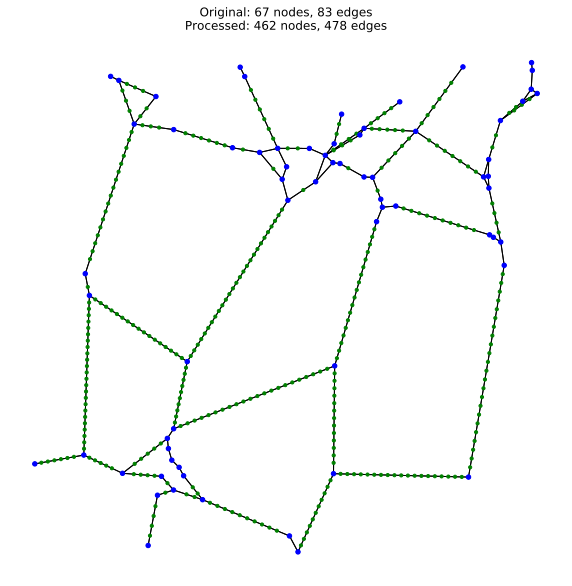

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
show_graph(H_harz, node_color='green', ax=ax, node_alpha=0.7, node_size=10)
show_graph(K_harz, node_color='blue', ax = ax, node_size=20)

ax.set_title(f"Original: {K_harz.number_of_nodes()} nodes, {K_harz.number_of_edges()} edges\n"
             f"Processed: {H_harz.number_of_nodes()} nodes, {H_harz.number_of_edges()} edges")

In [14]:
!mkdir -p ../data/homogenized_networks/harz

In [15]:
nx.write_gpickle(G_harz, '../data/homogenized_networks/harz/G_orig.gpkl')
nx.write_gpickle(K_harz, '../data/homogenized_networks/harz/G_coarse.gpkl')
nx.write_gpickle(H_harz, '../data/homogenized_networks/harz/G_homog.gpkl')

with open('../data/homogenized_networks/harz/mapping.pkl', 'wb') as f:
    pickle.dump(mapping_harz, f)

In [16]:
nx.average_shortest_path_length(G_harz), nx.average_shortest_path_length(K_harz), nx.average_shortest_path_length(H_harz)

(20.136177522894304, 6.46901854364541, 43.24125982477393)

In [17]:
nx.average_shortest_path_length(G_harz)

20.136177522894304

In [18]:
G_harz.number_of_nodes(), K_harz.number_of_nodes()

(394, 67)

# Goettingen

In [19]:
G_goe = osm_utils.download_streetnetwork_from_bbox(north=51.7219, south=51.4942, east=10.0758,
                                         west=9.8094, upto='secondary')

G_goe = ox.project_graph(G_goe)
K_goe, mapping_goe = osm_utils.postprocess_osm_network(G_goe, coarse_grain=100, return_node_mapping=True)
H_goe = osm_utils.homogenize_edge_lengths(K_goe, target_edge_length=400)

/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Original: 82 nodes, 103 edges\nProcessed: 420 nodes, 441 edges')

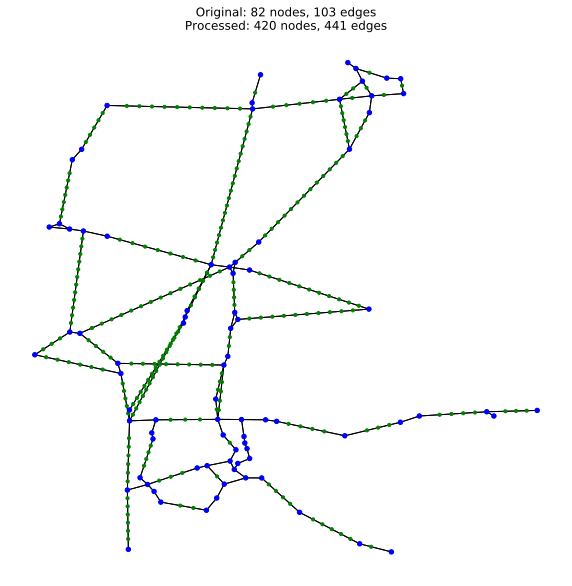

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
show_graph(H_goe, node_color='green', ax=ax, node_alpha=0.7, node_size=10)
show_graph(K_goe, node_color='blue', ax = ax, node_size=20)

ax.set_title(f"Original: {K_goe.number_of_nodes()} nodes, {K_goe.number_of_edges()} edges\n"
             f"Processed: {H_goe.number_of_nodes()} nodes, {H_goe.number_of_edges()} edges")

In [21]:
!mkdir -p ../data/homogenized_networks/goe

In [22]:
nx.write_gpickle(G_goe, '../data/homogenized_networks/goe/G_orig.gpkl')
nx.write_gpickle(K_goe, '../data/homogenized_networks/goe/G_coarse.gpkl')
nx.write_gpickle(H_goe, '../data/homogenized_networks/goe/G_homog.gpkl')

with open('../data/homogenized_networks/goe/mapping.pkl', 'wb') as f:
    pickle.dump(mapping_goe, f)

# Now multiple coarse grainings for Berlin

In [23]:
from collections import defaultdict

In [24]:
L_berlin_2 = osm_utils.download_streetnetwork_from_bbox(north=52.5697, south=52.4874, 
                                     east=13.4823, west=13.3216,
                                     upto='secondary')

L_berlin_2 = ox.project_graph(L_berlin_2)

In [25]:
all_graphs = defaultdict(lambda :dict())

for i, coarse_graining_meters in enumerate([50, 100, 200, 300, 400]):
    target_edge_arr = [coarse_graining_meters*fac for fac in (2, 3, 4)]
    for j, target_edge_length in enumerate(target_edge_arr):
        berlin_coarse = osm_utils.postprocess_osm_network(L_berlin_2, coarse_grain=coarse_graining_meters)
        berlin_hom = osm_utils.homogenize_edge_lengths(berlin_coarse, target_edge_length=target_edge_length)
        
        all_graphs[coarse_graining_meters][target_edge_length] = (berlin_coarse, berlin_hom)
        print(f"Done: {coarse_graining_meters}, {target_edge_length}")

/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 50, 100


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 50, 150


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 50, 200


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 100, 200


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 100, 300


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 100, 400


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 200, 400


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 200, 600


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 200, 800


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 300, 600


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 300, 900


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 300, 1200


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 400, 800


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 400, 1200


/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/pyproj/crs.py:686: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


Done: 400, 1600


In [26]:
import pickle

with open('../data/homogenized_networks/berlin/diff_coarse_graining/all_berlin.pkl', 'wb') as f:
    pickle.dump(dict(all_graphs), f)

In [27]:
fig, axes = plt.subplots(nrows=5, ncols = 3, figsize=(18, 18), squeeze=False)

for i, coarse_graining_meters in enumerate([50, 100, 200, 300, 400]):
    target_edge_arr = [coarse_graining_meters*fac for fac in (2, 3, 4)]
    for j, target_edge_length in enumerate(target_edge_arr):
        ax = axes[i, j]
        berlin_coarse, berlin_hom = all_graphs[coarse_graining_meters][target_edge_length]
        
        show_graph(berlin_hom, node_color='green', ax=ax, node_alpha=0.7, node_size=10)
        show_graph(berlin_coarse, node_color='blue', ax = ax, node_size=20)

        ax.set_title(
            f"Coarse graining ({coarse_graining_meters} m): {berlin_coarse.number_of_nodes()} nodes, {berlin_coarse.number_of_edges()} edges\n"
            f"Homonegined ({target_edge_length} m): {berlin_hom.number_of_nodes()} nodes, {berlin_hom.number_of_edges()} edges"
        )

/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):
